# Project: Spaceship Titanic

# Table of Contents
 - <a href='#Understanding the data and drawing useful assumptions from the data'>Understanding the data and drawing useful assumptions from the data
</a>
 - <a href='#Data wrangling'>Data wrangling</a>
 - <a href= '#Data splitting, transformation of categorical data and model training'>Data splitting, transformation of categorical data and model training</a>

## Objective: Predict which passengers were teleported to an alternate dimension

# Description:
This project is based on fictional data. It is described as follows;
The spaceship titanic was an interstellar passenger liner recendly launced. It had an approximate sum of about 13,000 passengers. The vessel set out on a voyage transporting emigrants from our solar system to three newly habitable exoplanets orditing nearby stars.

While around Alpha Centuri en route to its first destination, the torrid 55 Cancri E- the unwary "Spaceship Titanic" collided with a spacetime anomally as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension.

# File and Data Field Descriptions
train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

 - passengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
 - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
 - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
 - Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
 - Destination - The planet the passenger will be debarking to.
 - Age - The age of the passenger.
 - VIP - Whether the passenger has paid for special VIP service during the voyage.
 - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
 - Name - The first and last names of the passenger.
 - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. we are tasked to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the bool data type

- PassengerId - Id for each passenger in the test set.
- Transported - The target. For each passenger, predict either True or False.

# Necessary libraries import

In [1]:
# importing the required libraries

# Standard imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import figure

# Libraries for feature engineering
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

# Libraries for model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Libraries for splitting data sets into train and test splits
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data sets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# viewing the data frame and how the datasets looks like at a glace.
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<a id='Understanding the data and drawing useful assumptions from the data'></a>
# Understanding the data and drawing useful assumptions from the data

The use of various useful analytical techniques will be employed in order to understand the inter-relationships and inter-dependence between the data in the dataset and the various features.

In [4]:
# Performing simple discriptive statistics analysis on the data set.
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
# getting an understanding of the shape of the data frame.
train_data.shape

(8693, 14)

In [6]:
# identifying the various features annd their data dypes.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
train_data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

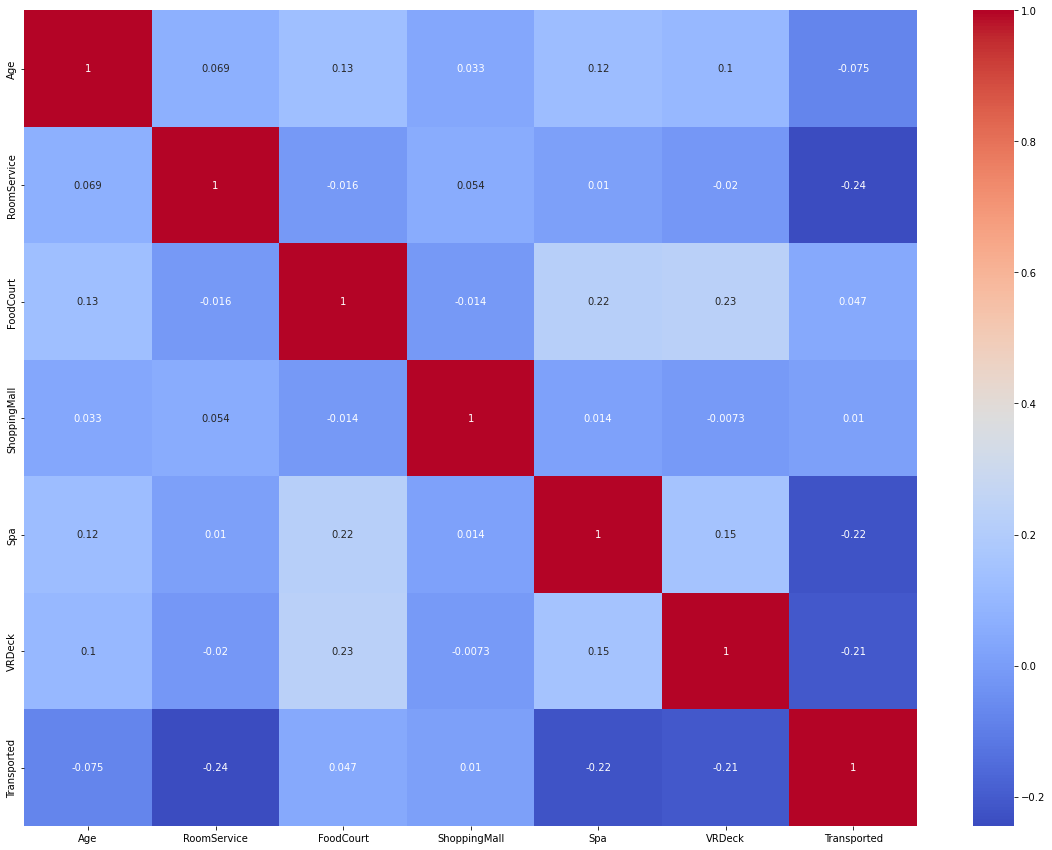

In [8]:
# performing correlation analysis on the data set for a better understanding of the features and their relationships.
plt.figure(figsize= (20, 15))
correlation = train_data.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True)
plt.show()

C:\Users\Mannie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mannie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mannie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mannie\anaconda3\li

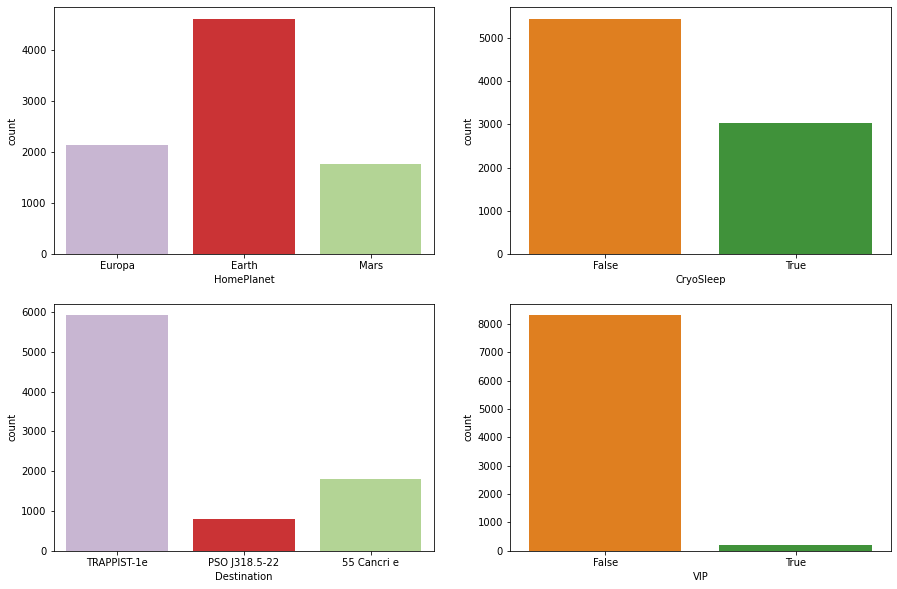

In [9]:
# Performance of data visualization on the data sets.
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(train_data["HomePlanet"], palette="Paired_r", ax=ax[0][0])
sns.countplot(train_data["CryoSleep"], palette="Paired_r", ax=ax[0][1])
sns.countplot(train_data["Destination"], palette="Paired_r", ax=ax[1][0])
sns.countplot(train_data["VIP"], palette="Paired_r", ax=ax[1][1])
plt.show()

C:\Users\Mannie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mannie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

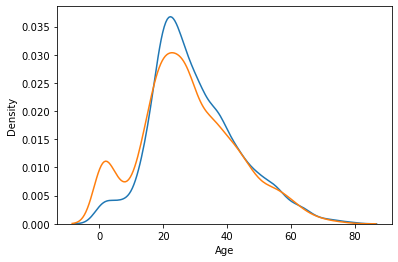

In [10]:
# Visualization of passengers who were transported and passengers who were'nt with reference to their ages. 
sns.distplot(train_data[train_data["Transported"]==0]["Age"], hist=False)
sns.distplot(train_data[train_data["Transported"]==1]["Age"], hist=False)

In [11]:
# Creating additional features via splitting of cabin data of train and test set into 'deck', 'num' and 'side'.
train_data[["deck", "num", "side"]] = train_data["Cabin"].str.split("/", expand=True)
test_data[["deck", "num", "side"]] = test_data["Cabin"].str.split("/", expand=True)

In [12]:
# Viewing the dataframe after the addition of new feature extracted from the cabin feature 
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [13]:
# A new feature 'TotalBill' was added to the dataframe. The values of feature 'TotalBill' was based of the summation of the
# 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' and 'VRDeck'.
# The features 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' and 'cabin' were dropped.
train_data["TotalBill"] = train_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1) 
test_data["TotalBill"] = test_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
train_data.drop(["Cabin", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1, inplace=True)
test_data.drop(["Cabin", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1, inplace=True)

In [14]:
# Checking for misssing values in the dataframe
train_data.isna().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
Name           200
Transported      0
deck           199
num            199
side           199
TotalBill        0
dtype: int64

In [15]:
# Checking the occurance of unique values in the deck and side features
train_data["deck"].value_counts(), train_data["side"].value_counts()

(F    2794
 G    2559
 E     876
 B     779
 C     747
 D     478
 A     256
 T       5
 Name: deck, dtype: int64,
 S    4288
 P    4206
 Name: side, dtype: int64)

In [16]:
# Viewing the dataframe after addition of new feature and removal of redundant features in the dataframe.
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,deck,num,side,TotalBill
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,F,1,S,1091.0


<a id= 'Data wrangling'></a>
# Data wrangling

the missing values will be filled based on the assumptions drawn from the data above with the use of some analytical techniques such as the simple descriptive statistics, correlation analysis, bar plot and mean distribution plot were all used to draw valuable data concerning the missing data and how missing values could be appropriately filled.

In [17]:
# Data clearing and filling of missing values of categotical data with approppriate representation.

# Training data
train_data["HomePlanet"] = train_data["HomePlanet"].fillna("Earth")
train_data["Destination"] = train_data["Destination"].fillna("TRAPPIST-1e")
train_data["deck"] = train_data["deck"].fillna("F")
train_data["side"] = train_data["side"].fillna("S")

# Test
test_data["HomePlanet"] = test_data["HomePlanet"].fillna("Earth")
test_data["Destination"] = test_data["Destination"].fillna("TRAPPIST-1e")
test_data["deck"] = test_data["deck"].fillna("F")
test_data["side"] = test_data["side"].fillna("S")

In [18]:
# Data clearing and filling of missing bool values with approppriate representation.

# Training data
train_data["CryoSleep"] = train_data["CryoSleep"].fillna(False).astype(int)
test_data["VIP"] = test_data["VIP"].fillna(False).astype(int)

# Test
train_data["VIP"] = train_data["VIP"].fillna(False).astype(int)
test_data["CryoSleep"] = test_data["CryoSleep"].fillna(False).astype(int)

In [19]:
# Viewing the dataframe after addition filling thr missing values.
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,deck,num,side,TotalBill
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,Willy Santantines,True,F,1,S,1091.0


In [20]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,deck,num,side,TotalBill
0,0013_01,Earth,1,TRAPPIST-1e,27.0,0,Nelly Carsoning,G,3,S,0.0
1,0018_01,Earth,0,TRAPPIST-1e,19.0,0,Lerome Peckers,F,4,S,2832.0
2,0019_01,Europa,1,55 Cancri e,31.0,0,Sabih Unhearfus,C,0,S,0.0
3,0021_01,Europa,0,TRAPPIST-1e,38.0,0,Meratz Caltilter,C,1,S,7418.0
4,0023_01,Earth,0,TRAPPIST-1e,20.0,0,Brence Harperez,F,5,S,645.0


In [21]:
# Data cleaning and filling of missing values of numerical data with approppriate representation.
# Test data
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data["num"] = train_data["num"].astype(float)
train_data["num"] = train_data["num"].fillna(train_data["num"].mean())

# Train data
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())
test_data["num"] = test_data["num"].astype(float)
test_data["num"] = test_data["num"].fillna(test_data["num"].mean())

In [22]:
# Dropping passenger names from the data fame
train_data.drop("Name", axis=1, inplace=True)
test_data.drop("Name", axis=1, inplace=True)

In [23]:
# Checking the test and train data set for any missing values.
print(f"""
{train_data.isna().sum()}
{test_data.isna().sum()}
""")


PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
deck           0
num            0
side           0
TotalBill      0
dtype: int64
PassengerId    0
HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
deck           0
num            0
side           0
TotalBill      0
dtype: int64



<a id='Data splitting, transformation of categorical data and model training'></a>
# Data splitting, transformation of categorical data and model training
This involes splitting of data sets into train and test sets and then fitting the train split into the model and evaluating the model with the test split.

In [56]:
# Dropping target values from train_data and reassigning it to a new variable y_train.
X_train = train_data.drop("Transported", axis=1)
y_train= train_data["Transported"]

In [57]:
# Assigning a variable to the test_data dataframe and comfirming its shape for better clarity during fitting.
x_test = test_data
x_test.shape

(4277, 10)

In [65]:
# Creating a categorical data transformer for better model performance.
transformer = make_column_transformer(
    (OneHotEncoder(drop="first", sparse=False, dtype=np.int32), ["HomePlanet", "Destination", "deck", "side"]),
    (StandardScaler(), ["Age", "num", "TotalBill"]),
    remainder="passthrough")

In [59]:
# Transformation of X_train dataset.
X_train = transformer.fit_transform(X_train)

In [60]:
# Transformation of x_test dataset.
x_test = transformer.fit_transform(x_test)

In [61]:
# Ecoding y_train dataset
label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)

In [62]:
# Creating a train test split to evaluate the precision of the model.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)

In [63]:
# Assignment of logistic regression to a variable.
lml_model = LogisticRegression()

In [64]:
# Assignment of Random forest classifier to a variable.
clf_model = RandomForestClassifier(n_jobs=1)

In [41]:
# Fitting the logistic regression model to the X_train and y_train dataset.
model_lml = lml_model.fit(X_train, y_train)

In [42]:
# Fitting the random forest classifier model to the X_train and y_train dataset.
model_clf = clf_model.fit(X_train, y_train)

In [43]:
# Scoring train split based on the logistic regression.
model_lml.score(X_train, y_train)

0.5058396464646465

In [44]:
# Scoring train split based on the random forest classifier.
model_clf.score(X_train, y_train)

1.0

In [45]:
# Scoring the test split.
model_lml.score(X_test, y_test)

0.5142045454545454

In [46]:
# Scoring the test split.
model_clf.score(X_test, y_test)

0.7102272727272727

In [50]:
# Predicting x_test values with the logistic regression.
lml_y_preds = model_lml.predict(x_test)
lml_y_preds[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [51]:
# Predicting x_test with the radom forest ckassifier.
clf_y_preds = clf_model.predict(x_test)
clf_y_preds[:20]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [66]:
submission_lml = pd.read_csv("sample_submission.csv")
submission_lml["Transported"] = lml_y_preds.astype("bool")
submission_lml.to_csv("my_submission_final_lml.csv", index=False)

In [67]:
submission_clf = pd.read_csv("sample_submission.csv")
submission_clf["Transported"] = clf_y_preds.astype("bool")
submission_clf.to_csv("my_submission_final_clf.csv", index=False)